# Monitor results

In [29]:
from exp import *

In [30]:
# results_file_name = 'segmentation_analysis_seed'
# columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']

# results_file_name = 'results/segmentation_analysis_seed'
# # columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']
# columns = ['Baseline','Segmented']

# results_file_name = 'results/color_analysis_seed'
# columns = ['Baseline','Max RGB','Shades of Gray']

# results_file_name = 'results/resnet_50_arl_seed'
# columns = ['Baseline','ARL']

results_file_name = 'results/efficientnet_attention_analysis_run_seed'
columns = ['Baseline','Without SE', "Without SE and with ARL", "With Both"]

# results_file_name = 'ben_analysis_seed'
# columns = ['Baseline','ben_color_transform']


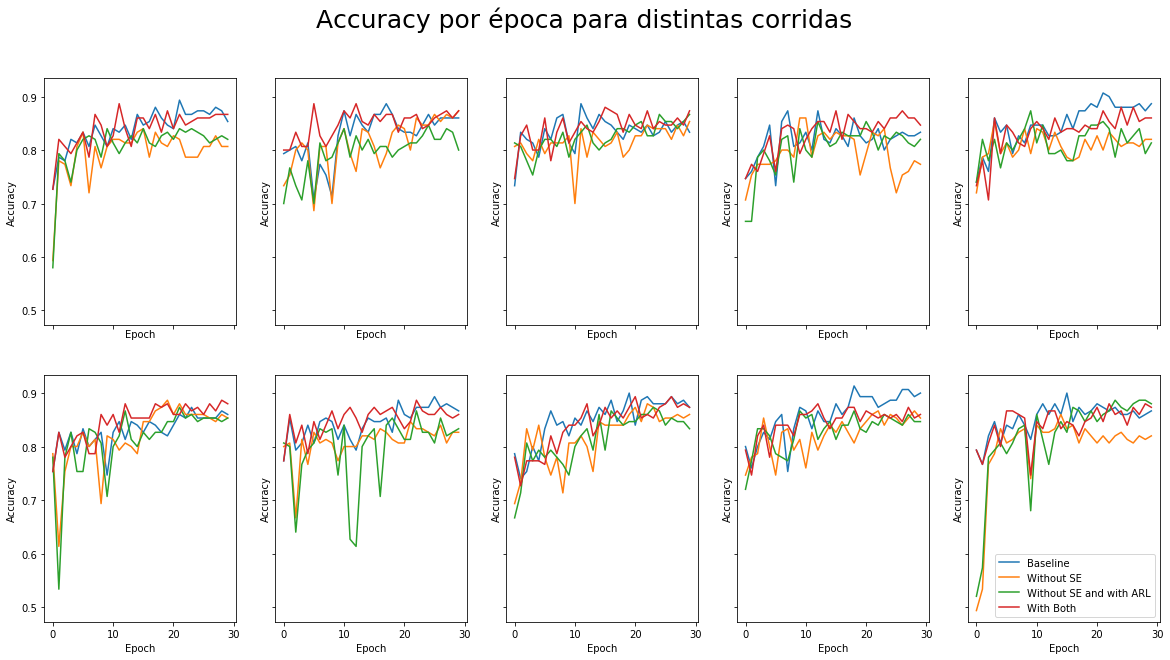

In [31]:
runs = {}
baseline = {}
fig, axs = plt.subplots(2,5, figsize=(20,10), sharey=True, sharex=True)
fig.suptitle('Accuracy por época para distintas corridas', fontsize=25)

for i in range(1,11):
#     baseline[i] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
    runs[i] = pd.read_csv(f'{results_file_name}_{i}.txt')
#     runs[i]['Baseline'] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
#     print(runs[i])
#     del runs[i]['Baseline SOG']
#     del runs[i]['Segmented SOG']
#     print(runs[i])
    ax = axs[(i-1) // 5 , (i-1) %5]
    ax.plot(runs[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')

#     runs[i].plot()
plt.legend(runs[i].columns)


In [32]:
max_dicc = {col: [runs[r].max()[col] for r in runs] for col in columns }

max_dicc

{'Baseline': [0.8933333158493042,
  0.8866666555404663,
  0.8866666555404663,
  0.8733333349227905,
  0.9066666960716248,
  0.8733333349227905,
  0.8933333158493042,
  0.8999999761581421,
  0.9133333563804626,
  0.8999999761581421],
 'Without SE': [0.8399999737739563,
  0.8733333349227905,
  0.8533333539962769,
  0.8600000143051147,
  0.8533333539962769,
  0.8866666555404663,
  0.8466666936874391,
  0.8799999952316284,
  0.8666666746139526,
  0.8600000143051147],
 'Without SE and with ARL': [0.8399999737739563,
  0.8466666936874391,
  0.8666666746139526,
  0.8533333539962769,
  0.8733333349227905,
  0.8733333349227905,
  0.8666666746139526,
  0.8733333349227905,
  0.8666666746139526,
  0.8866666555404663],
 'With Both': [0.8866666555404663,
  0.8866666555404663,
  0.8799999952316284,
  0.8733333349227905,
  0.8799999952316284,
  0.8866666555404663,
  0.8866666555404663,
  0.8933333158493042,
  0.8799999952316284,
  0.8799999952316284]}

In [33]:
df = pd.DataFrame(max_dicc)

In [34]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [35]:
df.describe().transpose().style.apply(highlight_max)

,count,mean,std,min,25%,50%,75%,max
Baseline,10.000000,0.892667,0.013128,0.873333,0.886667,0.893333,0.900000,0.913333
Without SE,10.000000,0.862000,0.014757,0.840000,0.853333,0.860000,0.871667,0.886667
Without SE and with ARL,10.000000,0.864667,0.014072,0.840000,0.856667,0.866667,0.873333,0.886667
With Both,10.000000,0.883333,0.005666,0.873333,0.880000,0.883333,0.886667,0.893333
